# 911 Calls Data Analysis Project

For this project I am analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). 

The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)


## Data and Setup

____
** Import numpy and pandas **

In [3]:
# Import the Library
import pandas as pd
import numpy as np
import csv
import xlsxwriter
import string
import datetime

** Import visualization libraries and set %matplotlib inline. **

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(rc={'figure.figsize':(11.7,8.27)})

** Read in the csv file as a dataframe called df **

In [6]:
# Exploring the  the dataset
df = pd.read_csv('911.csv')
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


** Check the info() of the df **

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


** Check the head of df **

## Basic Questions

** What are the top 5 zipcodes for 911 calls? **

In [8]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

** What are the top 5 townships (twp) for 911 calls? **

In [9]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

** Take a look at the 'title' column, how many unique title codes are there? **

In [10]:
# Using nunique to see how many distinct cases were there
df['title'].nunique()

110

## Creating new features

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. **

In [11]:
#Creating New Reason Column from title to split the Title into EMS, Fire,Traffic... etc
df['Reason']=df['title'].apply(lambda title: title.split(':')[0])

In [12]:
df['Reason'].head()

0     EMS
1     EMS
2    Fire
3     EMS
4     EMS
Name: Reason, dtype: object

** What is the most common Reason for a 911 call based off of this new column? **

In [13]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

EMS is the most common reason for most of the 911 calls

** Creating a countplot of 911 calls by Reason. **

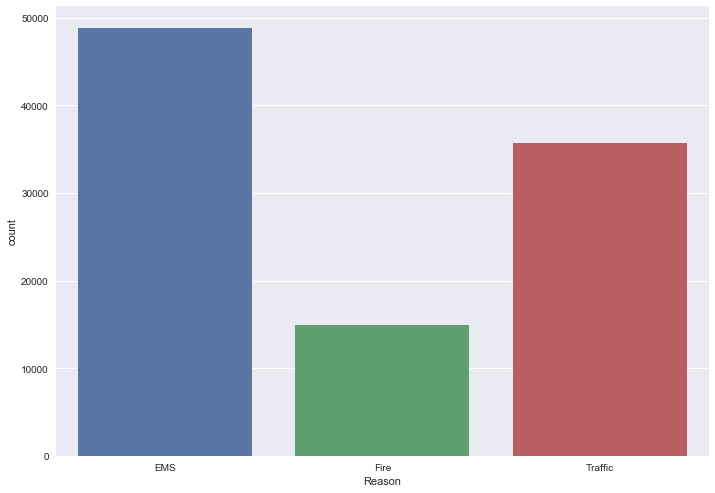

In [14]:
sns.countplot(x='Reason',data=df)

** Converting timestamp column into datetime datatype **

In [15]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])

** Splitting TimeStamp in Time, Month and Day**

In [21]:
df['Hour']=df['timeStamp'].apply(lambda time: time.hour)
df['Month']=df['timeStamp'].apply(lambda time: time.month)
df['Day']=df['timeStamp'].apply(lambda time: time.dayofweek)
df['Year']=df['timeStamp'].apply(lambda time: time.year)
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day,Year
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3,2015
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3,2015
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3,2015
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3,2015
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3,2015


** Mapping Day of week using .map() to pass actual string names to the day of week **


In [22]:
 dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [23]:
df['Day']=df['Day'].map(dmap)
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day,Year
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015


In [24]:
# Most busy year with total number of calls recieved:
df["Year"].value_counts().head(1)

2016    91523
Name: Year, dtype: int64

** Creating a count plot of the reasons**

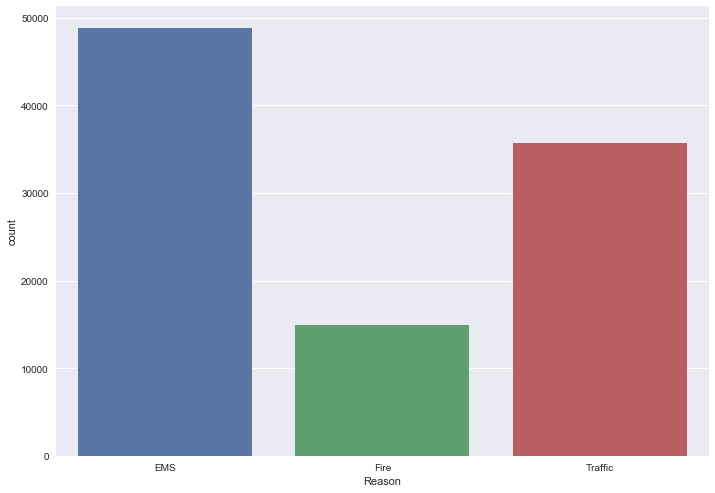

In [26]:
sns.countplot(x='Reason',data=df)

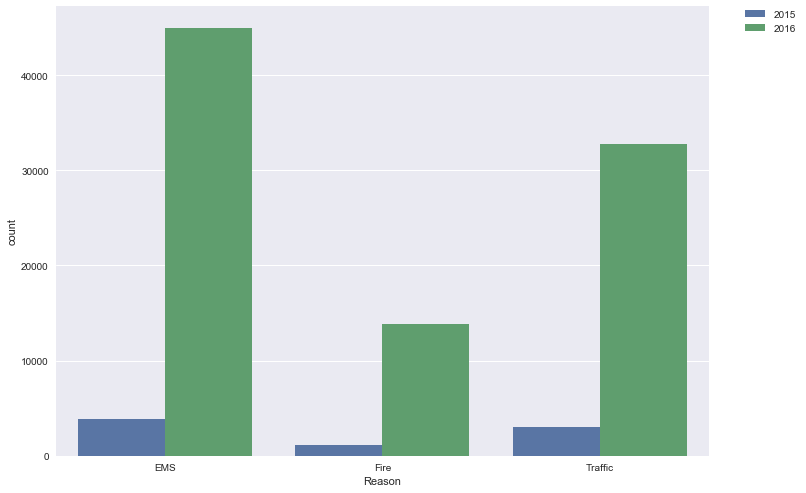

In [28]:
sns.countplot(x='Reason',data=df,hue='Year')
plt.legend(bbox_to_anchor=(1.05,1), loc=2,borderaxespad=0.)

** Creating a countplot of the Day of Week column with the hue based off of the Reason column. **

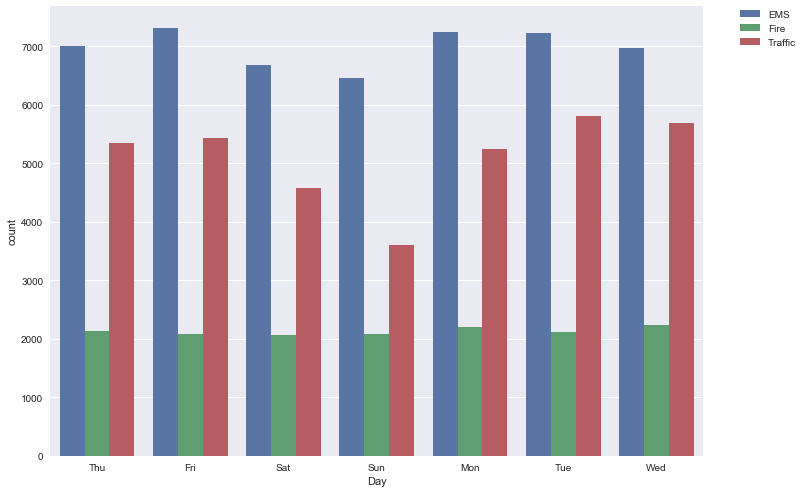

In [31]:
sns.countplot(x='Day',data=df,hue='Reason')
plt.legend(bbox_to_anchor=(1.05,1), loc=2,borderaxespad=0.)

** CountPlot for Month:**

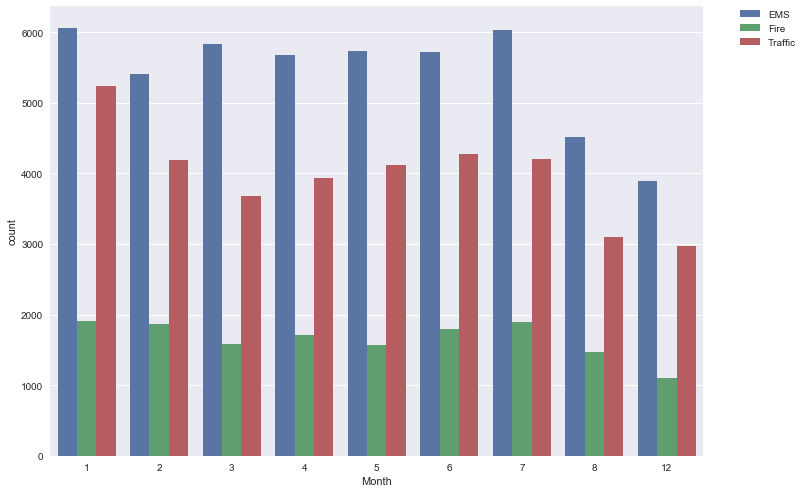

In [32]:
sns.countplot(x='Month',data=df,hue='Reason')
plt.legend(bbox_to_anchor=(1.05,1), loc=2,borderaxespad=0.)

**Some of the values are missing for months after August**

_____

** Plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas... **

** Creating a gropuby object called byMonth, where grouping the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame. **

In [33]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day,Year
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015


In [34]:
byMonth=df.groupby('Month').count()

In [35]:
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day,Year
Month,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423


Some of the count is different Columns(note: zip column for Jan month is having different values because some of the values are missing)

** Creating a simple plot off of the dataframe indicating the count of calls per month. **

Using lat column to even everything out. Assuming lat of the call then calls actually took place.

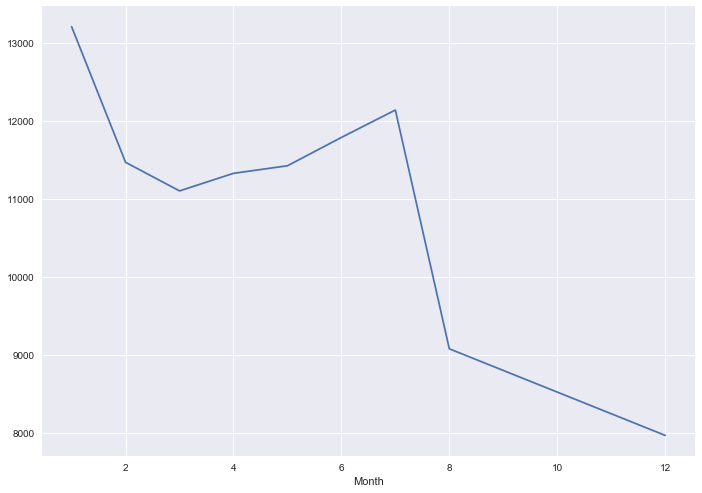

In [36]:
byMonth['lat'].plot()

There is a drop in 911 calls from september to december

In [37]:
byTown=df.groupby('twp').count()
byTown.head()

,lat,lng,desc,zip,title,timeStamp,addr,e,Reason,Hour,Month,Day,Year
twp,,,,,,,,,,,,,
ABINGTON,5977,5977,5977,5675,5977,5977,5959,5977,5977,5977,5977,5977,5977
AMBLER,601,601,601,583,601,601,594,601,601,601,601,601,601
BERKS COUNTY,284,284,284,172,284,284,276,284,284,284,284,284,284
BRIDGEPORT,555,555,555,432,555,555,554,555,555,555,555,555,555
BRYN ATHYN,173,173,173,161,173,173,173,173,173,173,173,173,173


** Creating a Linear fit on the number of calls per months**

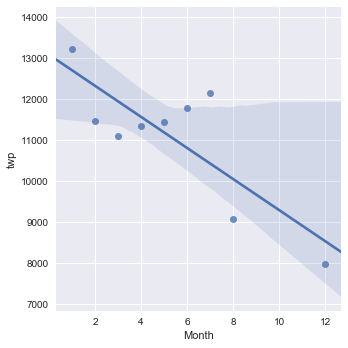

In [38]:
sns.lmplot(x='Month',y='twp', data=byMonth.reset_index())

Error Increases as we go from month 1 to 12

**Creating a new column called 'Date' that contains the date from the timeStamp column. ** 

In [39]:
df['Date']=df['timeStamp'].apply(lambda t:t.date())
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day,Year,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015,2015-12-10


** Creating a groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

Since There are missing values in zipcode and other columns, Hence Using lat column for plotting the trend graphs

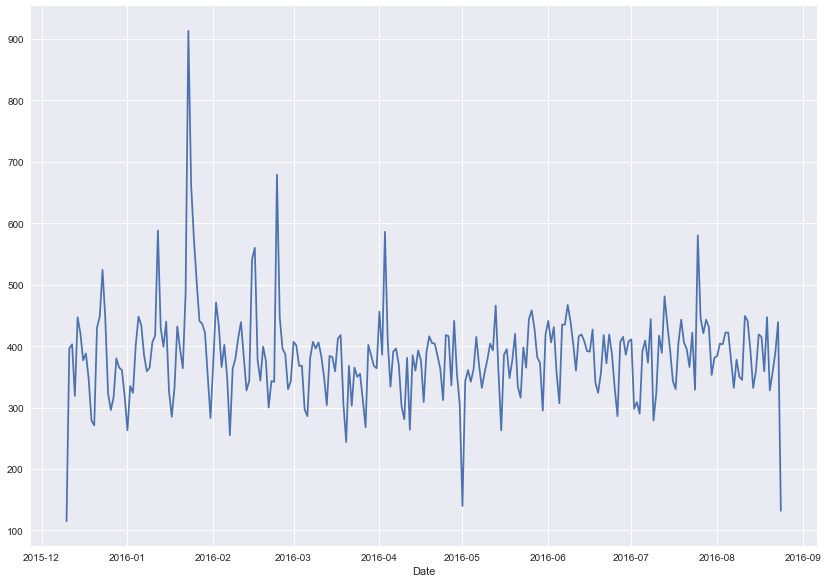

In [40]:
df.groupby('Date').count()['lat'].plot()
plt.tight_layout()

In the month of Feb,Mar and April there was increase in number of calls and in the month May, Aug there is significant drop in 911 calls.

# Exploring Calls Trend for the Reasons

** Traffic vs Date**

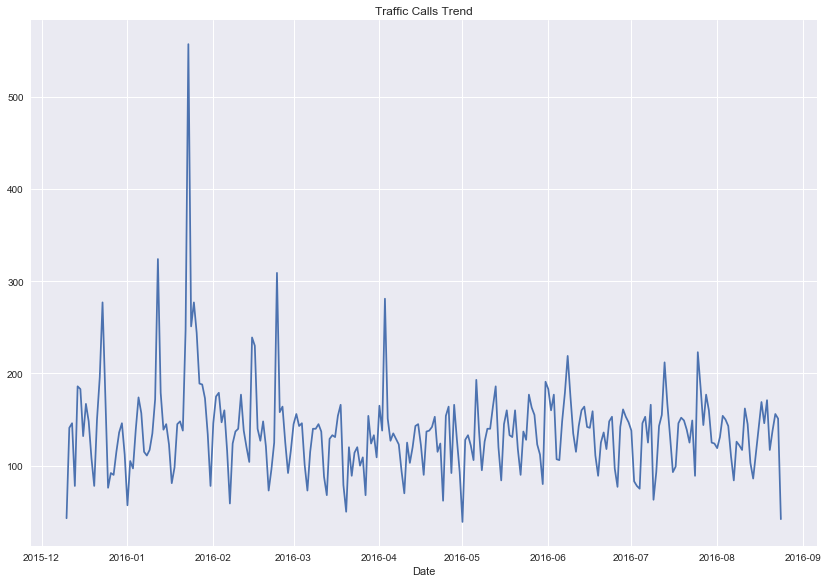

In [41]:
df[df['Reason']=='Traffic'].groupby('Date').count()['lat'].plot()
plt.title('Traffic Calls Trend')
plt.tight_layout()

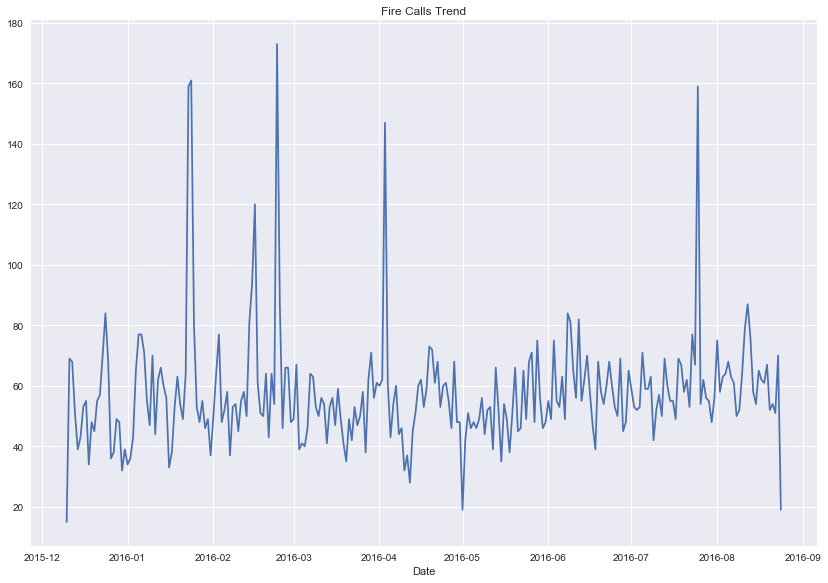

In [42]:
df[df['Reason']=='Fire'].groupby('Date').count()['lat'].plot()
plt.title('Fire Calls Trend')
plt.tight_layout()

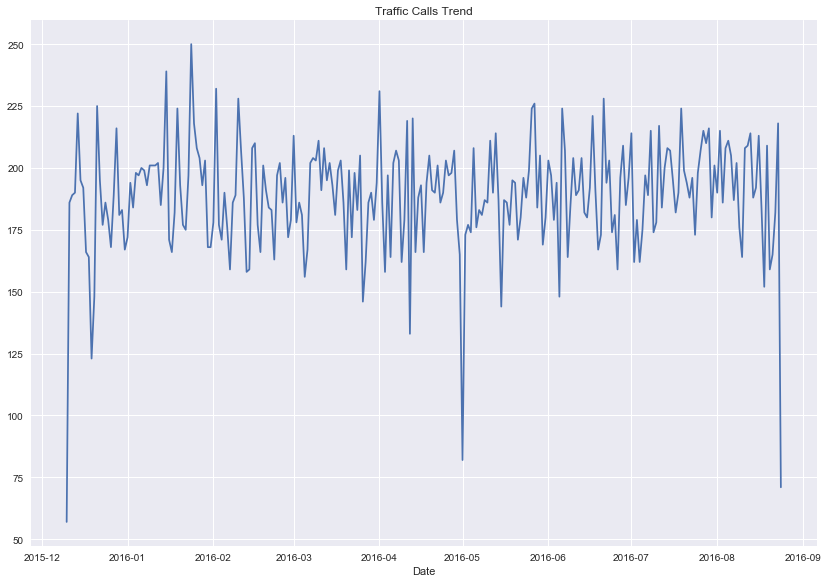

In [43]:
df[df['Reason']=='EMS'].groupby('Date').count()['lat'].plot()
plt.title('Traffic Calls Trend')
plt.tight_layout()

____
** Creating  heatmaps with seaborn and our data.**

In [44]:
dayHour=df.groupby(by=['Day','Hour']).count()['Reason'].unstack()
dayHour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


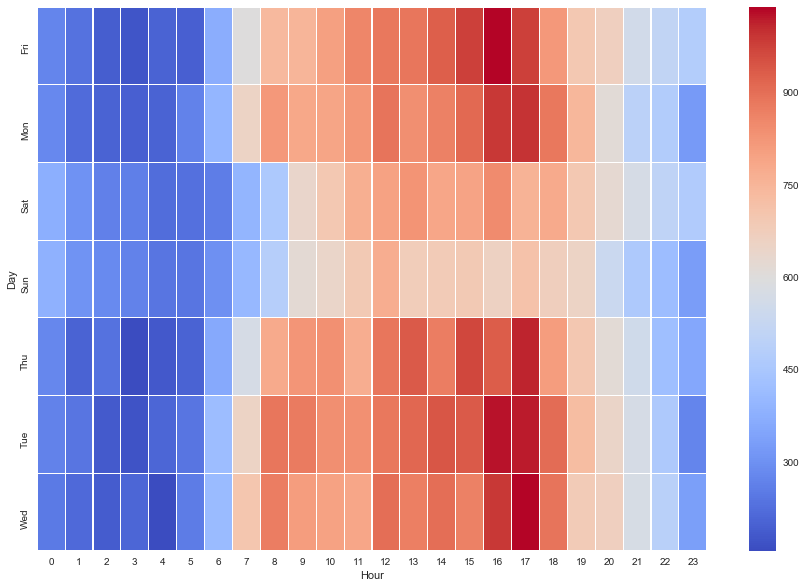

In [46]:
plt.figure(figsize= (15,10))
sns.heatmap(dayHour, cmap = "coolwarm", linewidths=.1)

** Now create a clustermap using this DataFrame. **

<Figure size 1080x720 with 0 Axes>

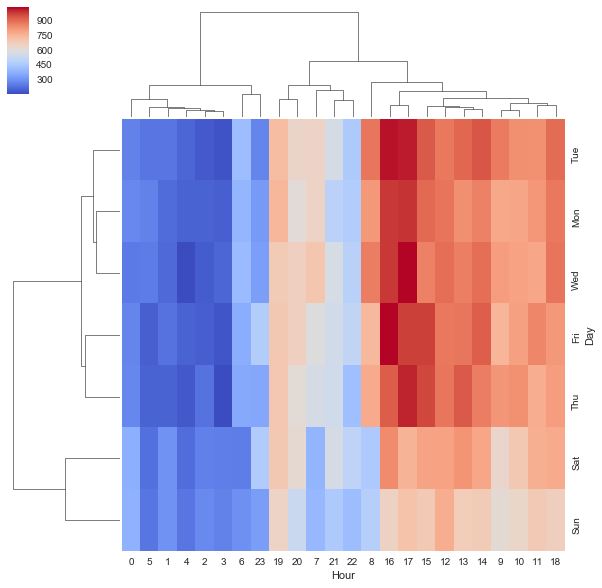

In [47]:
plt.figure(figsize= (15,10))
sns.clustermap(dayHour, cmap = "coolwarm")

** Now repeat these same plots and operations, for a DataFrame that shows the Month as the column. **

In [48]:
MonthvsHour=df.groupby(by=['Day','Month']).count()['Reason'].unstack()
MonthvsHour.head()

Month,1,2,3,4,5,6,7,8,12
Day,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


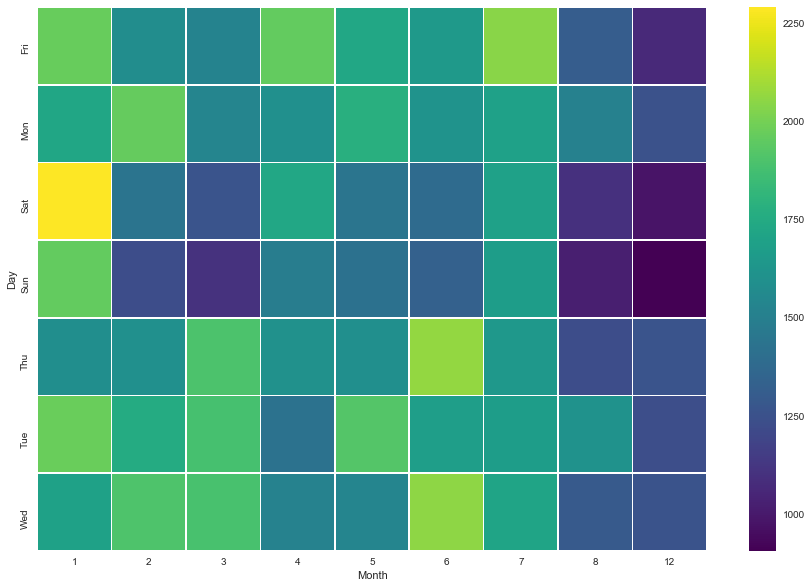

In [50]:
plt.figure(figsize=(15,10))
sns.heatmap(MonthvsHour, cmap="viridis", linewidths=.5)

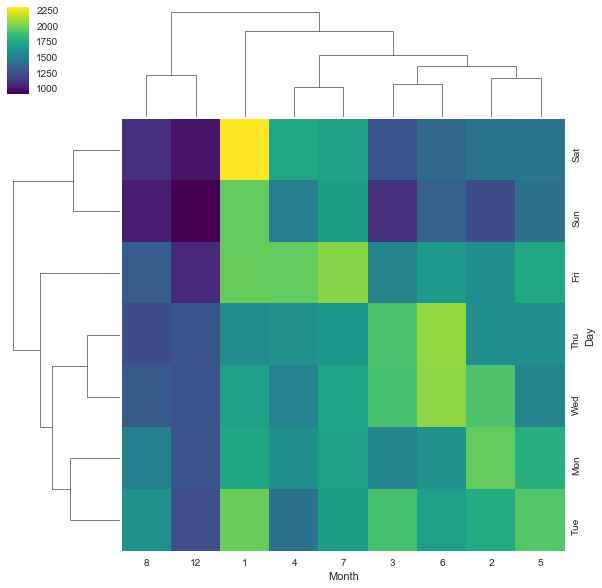

In [51]:
sns.clustermap(MonthvsHour, cmap = "viridis")

** Feedbacks are welcome **